In [ ]:
# Elaborado por:
# Ana Mantilla : anagmd2019@gmail.com
# Paul Goyes : goyes.yesid@gmail.com

In [1]:
#Importar las librerías

import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Importar los datos con pandas

df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PAPER_DL/TRAINING/012_exp8.csv', sep=';')

In [4]:
df.head(2)

,DEP,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,1,-1.94986,0.70209,-0.68331,0.25269,0.69226,-0.93773,0.08245
1,1,-1.03972,1.45996,0.34377,0.64018,0.81872,-0.25594,-0.56781


In [5]:
df.shape

(233, 8)

In [6]:
#Extraer las variables

x_names = ['DEP','PC1','PC2','PC3','PC4','PC5','PC6','PC7']
label = 'DEP'

In [7]:
# Definir variables de entrada y salida

X = df[x_names]
y = df['DEP']

In [ ]:
# Instalar librería para usar randomforest

!pip install tensorflow_decision_forests

In [9]:
#Importar las librerías

import tensorflow as tf
import tensorflow_decision_forests as tfdf

In [10]:
# Convertir dataframe a un dataset de tensorflow

train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(X, label='DEP')

In [11]:
#Crear el modelo

model = tfdf.keras.RandomForestModel(num_trees=2000, categorical_algorithm='CART')

Use /tmp/tmpyjg7ibb8 as temporary training directory


In [12]:
#Definir la función de pérdida binary cross entropy

lossf=tf.keras.losses.BinaryCrossentropy()

#Añadir función de pérdida

model.add_loss(lossf)


In [13]:
#Compilar métricas

model.compile("accuracy")

In [14]:
#Entrenar el modelo

#@tf.autograph.experimental.do_not_convert #esto es para silenciar las advertencias en la celda

import time
start1 = time.time()
history=(model.fit(x=train_ds, callbacks=None))
end1 = time.time()
T1 = end1 - start1

Reading training dataset...
Training dataset read in 0:00:11.585980. Found 233 examples.
Training model...
Model trained in 0:00:00.713281
Compiling model...
Model compiled.


In [15]:
T1

18.525591373443604

In [ ]:
#imprimir resumen del modelo

print(model.summary())

In [ ]:
# imprimir un diagrama de grafo del modelo

#dot_img_file= tfdf.model_plotter.plot_model_in_colab(model, max_depth=2)
#dot_img_file

In [ ]:
import pickle

# Saving the model
with open("/content/drive/MyDrive/Colab Notebooks/PAPER_DL/MODELOS-FINALES/randomforest_exp8.pkl", "wb") as f:
    pickle.dump(model, f)

In [ ]:
val_points = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PAPER_DL/TRAINING/04_Validation_Points.csv')
x_names = ['PC1','PC2','PC3','PC4','PC5','PC5','PC7']
X = val_points[x_names]

y_names = ['DEP']
Y = val_points[y_names]

**02. Evaluar las métricas**

In [ ]:
#evaluar el modelo

model.make_inspector().evaluation()

Evaluation(num_examples=233, accuracy=0.9484978540772532, loss=0.2977302648994448, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

In [ ]:
import matplotlib.pyplot as plt

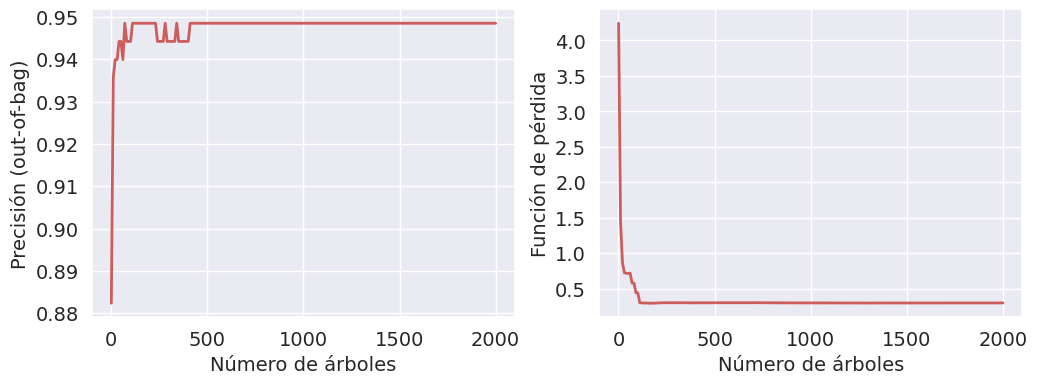

In [ ]:
#Graficar métricas

import matplotlib.pyplot as plt

logs = model.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs], color = 'indianred', linewidth=2)
plt.xlabel("Número de árboles", fontsize = 14)
plt.ylabel("Precisión (out-of-bag)", fontsize = 14)
plt.xticks([0,500,1000,1500,2000], fontsize = 14)
plt.yticks(fontsize = 14)

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs],  color = 'indianred', linewidth=2)
plt.xlabel("Número de árboles", fontsize = 14)
plt.ylabel("Función de pérdida", fontsize = 14)
plt.xticks([0,500,1000,1500,2000], fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [ ]:
# # Validación del modelo con los datos de testeo

val = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PAPER_DL/TRAINING/04_Validation_Points.csv')

# Validación del modelo con los datos de testeo
x_names_val = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7']
x_val = val[x_names_val]

y_name_val = ['DEP']
y_val = val[y_name_val]

In [ ]:
x_val.shape

(40, 7)

In [ ]:
# # Comparar los datos predichos y los originales. Primero convertir esos datos a un tf dataset

test = tfdf.keras.pd_dataframe_to_tf_dataset(x_val)

In [ ]:
# # Predecir los datos

pred_test = model.predict(test)

1/1 [==============================] - 0s 81ms/step


In [ ]:
np.save('/content/drive/MyDrive/Colab Notebooks/PAPER_DL/METRICAS-MODELOS/exp8.npy', pred_test)

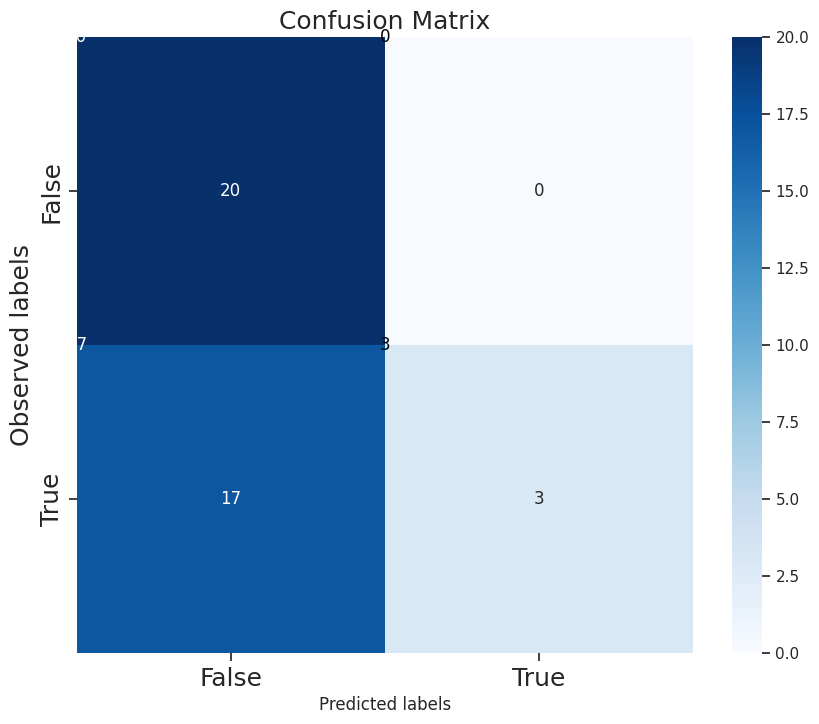

In [ ]:
# Matriz de confusión

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

matriz3 = confusion_matrix(Y, np.around(pred_test))
plot_confusion_matrix(conf_mat = matriz3, figsize = (10,8))

ax = plt.subplot()
sns.set(font_scale=1) # Adjust to fit
sns.heatmap(matriz3, annot=True, ax=ax, cmap="Blues", fmt="g");

# Labels, title and ticks
label_font = {'size':'18'}  # Adjust to fit
ax.set_xlabel('Predicted labels');
ax.set_ylabel('Observed labels',fontdict=label_font);

title_font = {'size':'18'}  # Adjust to fit
ax.set_title('Confusion Matrix', fontdict=title_font);

ax.tick_params(axis='both', which='major', labelsize=18)  # Adjust to fit
ax.xaxis.set_ticklabels(['False', 'True']);
ax.yaxis.set_ticklabels(['False', 'True']);

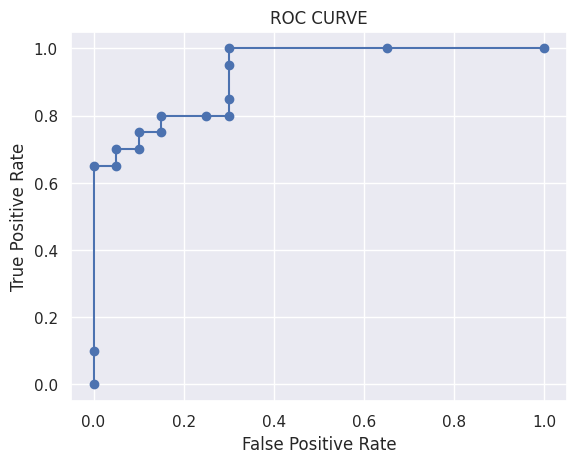

In [ ]:
# Cálculo del AUC y ROC

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

fpr_, tpr_, thresholds_ = roc_curve(Y, pred_test)

plt.plot(fpr_, tpr_, marker='o')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.grid(True)


In [ ]:
# Cálculo del AUC

from sklearn import metrics

print(f'El AUC para el modelo de bosques aleatorios es de: {metrics.auc(fpr_, tpr_)}')

El AUC para el modelo de bosques aleatorios es de: 0.9249999999999999


**03. Predicción de la probabilidad con los valores del ráster virtual**

In [ ]:
from osgeo import gdal

raster  = gdal.Open('/content/drive/MyDrive/Colab Notebooks/PAPER_DL/VIRTUAL_RASTER/02_PCA.tif')

In [ ]:
# verificar propiedades del raster

driver = raster.GetDriver()
col   = raster.RasterXSize
rows  = raster.RasterYSize
nelem = col*rows

print('numero de filas: ', rows)
print('numero de columnas: ', col)

numero de filas:  110
numero de columnas:  118


In [ ]:
# guardar valor de Nondata value del raster para encontrar

Nonvalue = raster.GetRasterBand(1).GetNoDataValue()

In [ ]:
# pasar a np y flatenizar

v1val = raster.GetRasterBand(1).ReadAsArray().flatten()
v2val = raster.GetRasterBand(2).ReadAsArray().flatten()
v3val = raster.GetRasterBand(3).ReadAsArray().flatten()
v4val = raster.GetRasterBand(4).ReadAsArray().flatten()
v5val = raster.GetRasterBand(5).ReadAsArray().flatten()
v6val = raster.GetRasterBand(6).ReadAsArray().flatten()
v7val = raster.GetRasterBand(7).ReadAsArray().flatten()

# agrupar en matriz NX9

DATA = np.stack((v1val,v2val,v3val,v4val,v5val,v6val,v7val), axis=1)

In [ ]:
#eliminar los NonData

NanValues = np.where(v1val == Nonvalue)[0]
cP        = np.arange(0,nelem)
cPP       = np.delete(cP, NanValues, axis=0)

XX = np.delete(DATA, NanValues, axis=0)

In [ ]:
#Convertir valores del ráster en un df

df_raster = pd.DataFrame(XX, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])

In [ ]:
df_raster.head(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,0.853933,0.789321,-0.227036,0.970921,-0.012149,0.590995,-0.119167
1,1.300525,0.876177,-0.093983,1.079684,0.686075,0.866838,-0.187473


In [ ]:
df_raster.shape

(12980, 7)

In [ ]:
#Convertir el data frame en un dataset de tensorflow

raster_k = tfdf.keras.pd_dataframe_to_tf_dataset(df_raster)

In [ ]:
# predicción
y_raster=model.predict(raster_k)

13/13 [==============================] - 1s 79ms/step


In [ ]:
# Ahora debemos crear nuevamente el formato de datos para llevarlo al raster.
# usaremos una variable nueva llena de zeros.En la cual insertaremos los NonValues y los valores de la predicción.
# el tamaño de esta variable será el mismo que el raster

Rasterdataarray = np.zeros((rows,col)).flatten()

# cPP contiene las posiciones donde van las predicciones
for i in range(cPP.shape[0]):
    Rasterdataarray[cPP[i]]=y_raster[i]

# NanValues contiene las posiciones donde van los NOnValues
for i in range(NanValues.shape[0]):
    Rasterdataarray[NanValues[i]]=Nonvalue


# guardar la predicción en un raster con las mismas caracteristicas del raster input

Rasterout = driver.Create('/content/drive/MyDrive/Colab Notebooks/PAPER_DL/MAPA_PROBABILIDAD/RandomForest_exp8.tif', col, rows, 1, gdal.GDT_Float32) #esta ruta se modifica según donde desee que se guarde el mapa de probabilidad en su Google Drive
# Write metadata
Rasterout.SetGeoTransform(raster.GetGeoTransform())
Rasterout.SetProjection(raster.GetProjection())

Rasterout.GetRasterBand(1).WriteArray(Rasterdataarray.reshape(rows,col))
Rasterout.GetRasterBand(1).SetNoDataValue(Nonvalue)
Rasterout = None
del Rasterout

<ipython-input-356-b172d19cfd76>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Rasterdataarray[cPP[i]]=y_raster[i]


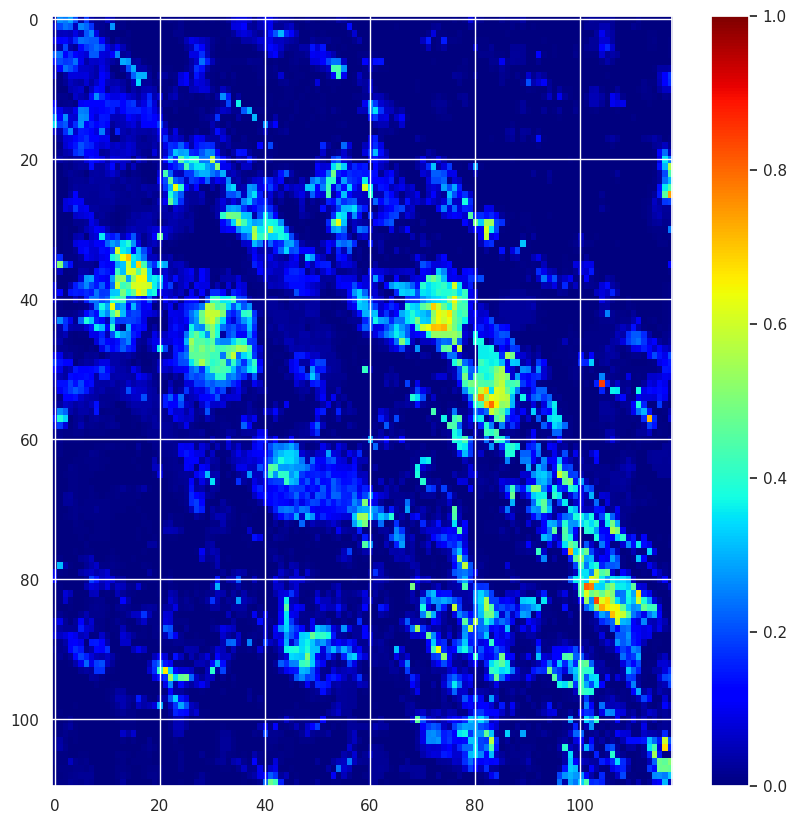

In [ ]:
# para verificar podemos graficar nuevamente el array
# hacemos una variable temp2 para evitar cualquier daño en el resto de variables
temp1 = Rasterdataarray.copy()
temp1[temp1==Nonvalue] = None

plt.figure(figsize=(10,10))
plt.imshow(   temp1.reshape((rows,col)), aspect='auto',cmap='jet', vmin=0, vmax=1)

plt.colorbar()
#plt.savefig("/content/drive/MyDrive/TESIS/PCA/random-forest-8-pca.png", dpi=350)